In [1]:
import arcpy,numpy

In [2]:
rasnum = arcpy.RasterToNumPyArray(r"D:\workspace\DevWork\work\abiGA\notebook培训\data\dem\Himalaya100.tif")

In [3]:
rasnum

array([[6163, 6201, 6197, ..., 6097, 6083, 6063],
       [6059, 6099, 6125, ..., 6096, 6082, 6062],
       [6042, 6074, 6104, ..., 6086, 6069, 6052],
       ...,
       [5169, 5172, 5166, ..., 5928, 5918, 5850],
       [5145, 5155, 5154, ..., 5900, 5874, 5843],
       [5170, 5151, 5154, ..., 5873, 5858, 5823]], dtype=int16)

In [4]:
xa,ya = rasnum.shape

In [5]:
def surface3d_data():
    for y in range(0, ya):
        for x in range(0, xa):
            yield [x, y, int(rasnum[x][y])]

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LightSource

In [7]:
col = []
for c in sns.color_palette("terrain",20):
    v = "#"
    for r in c:
        r0 = hex(int(r*255))[2:]
        if len(r0) < 2:
            r0 = "0{0}".format(r0)
        v +=r0
    col.append(v)

In [8]:
from example.commons import Faker
from pyecharts import options as opts
from pyecharts.charts import Surface3D

In [9]:
c = (
    Surface3D()
    .add(
        "",
        list(surface3d_data()),
        xaxis3d_opts=opts.Axis3DOpts(type_="value"),
        yaxis3d_opts=opts.Axis3DOpts(type_="value"),
        zaxis3d_opts=opts.Axis3DOpts(type_="value",max_=9000,min_=5000),
        grid3d_opts=opts.Grid3DOpts(width=100, height=100, depth=100),
    )
    .set_global_opts(
        title_opts=opts.TitleOpts(title="喜马拉雅山"),
        visualmap_opts=opts.VisualMapOpts(
            max_=8848, min_=4000, range_color=col
        ),
    )
)

In [10]:
c.render_notebook()

In [11]:
from mpl_toolkits.mplot3d import Axes3D

In [12]:
num = 120

In [13]:
ncols, nrows = rasnum.shape
x = numpy.linspace(0,num, ncols)
y = numpy.linspace(0,num, nrows)
x,y = numpy.meshgrid(x, y)
region = numpy.s_[0:num,0:num]
nx, ny, nz =x[region], y[region],rasnum[region]

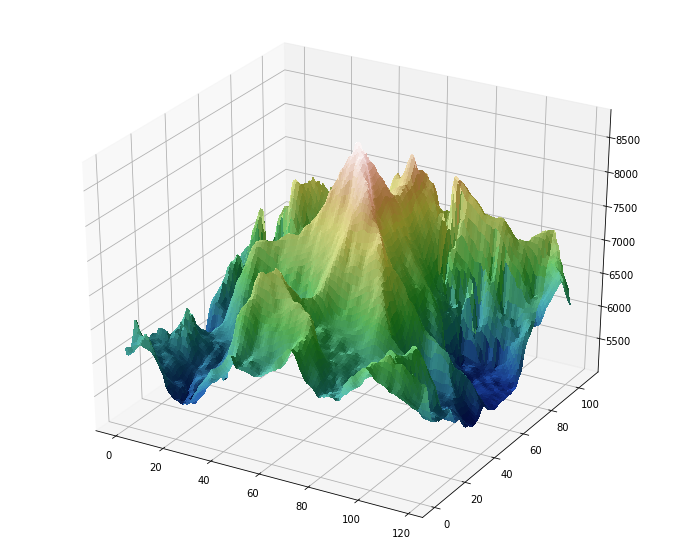

In [14]:
fig, ax = plt.subplots(subplot_kw=dict(projection='3d'), 
                       figsize=(12,10))
ls = LightSource(270, 20) 
rgb = ls.shade(nz, cmap=plt.cm.gist_earth, 
               vert_exag=0.1, blend_mode='soft')
surf = ax.plot_surface(nx, ny, nz, rstride=1, cstride=1, facecolors=rgb,
                        linewidth=0, antialiased=False, shade=False)
plt.show()